# Probability & Summary Statistics

## Setup and Loading Packages

In [1]:
# Import relevant packages
import yfinance as yf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
from datetime import datetime, timedelta

Specifying stock ticker, start date, and end date. In our example, the stock is Apple (Ticker: AAPL).

In [2]:
TICKER = 'AAPL' # Stock Ticker symbol
START_DATE = '2013-06-01' # Stock data start date
END_DATE = '2023-06-01' # Stock data end date

Extracting ajusted close prices of Apple's stock from Yahoo Finance.

In [3]:
stockPx = yf.download(TICKER, START_DATE, END_DATE)['Adj Close'] # Retrieve adjusted close price data from yahoo finance
stockLogRet = np.log(stockPx).diff().dropna() # Calculate log returns and drop null values

[*********************100%***********************]  1 of 1 completed


## Probability Distribution Functions (pdf)

In short, pdf is just a random function that inputs a potential outcome and outputs the probability of achieving that outcome. Here, we use our sample mean and standard deviation as parameters for our theoretical pdf. 

Text(0, 0.5, 'Density')

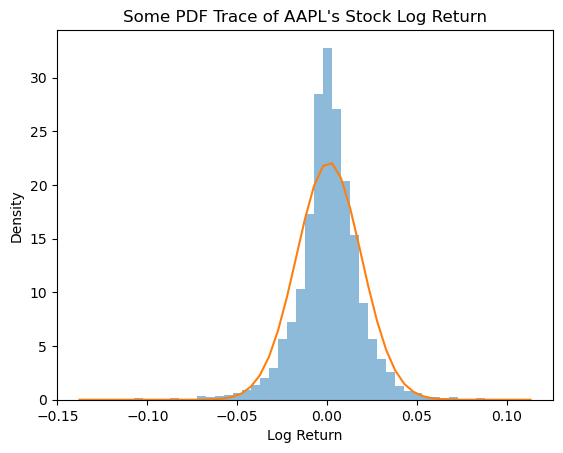

In [7]:
_, bins, _= plt.hist(stockLogRet, bins=50, density=1, alpha=0.5) # Plot histogram
# Specify Normal distriubtion parameters: mu= mean, sigma= standard deviation
mu, sigma = stats.norm.fit(stockLogRet)
pdf = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mu))**2)) # Normal pdf formula
plt.plot(bins, pdf) # Plot the Normal pdf
plt.title("Some PDF Trace of " + TICKER + "'s Stock Log Return") # Label title
plt.xlabel("Log Return"); plt.ylabel("Density") # Label x-axis

## Summary Statistics

In [20]:
PAIR = ['ADBE','CMG'] # Enter the two ticker symbols here
TAU = 5         # Enter the lookback period of your data

In [21]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # Data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # Data end date
stockPxPair = yf.download(PAIR, START_DATE, END_DATE)['Adj Close'] # Retrieve adjusted close price data from yahoo finance
stockLogRetPair = np.log(stockPxPair).diff().dropna() # Calculate log returns and drop null values

[*********************100%***********************]  2 of 2 completed


ADBE vs CMG's daily log returns summary statistics 

In [23]:
# Make a dataframe to store summary statistics
sum_stats = pd.DataFrame({'mean':stockLogRetPair.mean(), 'sd': stockLogRetPair.std(), 'skewness':stockLogRetPair.skew(), 'excess kurtosis':stockLogRetPair.kurtosis()})
sum_stats 

,mean,sd,skewness,excess kurtosis
ADBE,0.000431,0.024047,-0.575768,7.565034
CMG,0.001205,0.022763,0.439296,7.087053


## Reward-to-Risk (RR)

In [25]:
# Calculate reward-to-risk statistics
stockLogRetPair.mean()/stockLogRetPair.std()

ADBE    0.017923
CMG     0.052949
dtype: float64